In [1]:
import csv

In [42]:
import pandas as pd

In [97]:
path = "../large-corpus/"
prefix = "sparse_tmp"

#path = "../../bert-cmp/bert/"
#prefix=""

In [98]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [104]:
results_df = pd.read_csv(path+'pretraining_output-100k/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,414,377,14,2,11,8,3130,156,654,262,...,0,0,0,0,0,0,0,0,0,0
1,102,1814,16,2,11,22,3597,102,212,8,...,0,0,0,0,0,0,0,0,0,0
2,8,8,7,2,25,20,22,26,8,20,...,0,0,0,0,0,0,0,0,0,0
3,8,8,2,2,11,4,3618,2928,415,8,...,0,0,0,0,0,0,0,0,0,0
4,22,22,6,2,399,24,24,24,24,22,...,0,0,0,0,0,0,0,0,0,0
5,60,60,6,2,20,22,43,8,27,4,...,0,0,0,0,0,0,0,0,0,0
6,8,8,21,2,31,32,33,414,37,24,...,0,0,0,0,0,0,0,0,0,0
7,24,24,38,2,6,15,17,7,24,74,...,0,0,0,0,0,0,0,0,0,0
8,65,65,4,2,6,7,8,4,24,11,...,0,0,0,0,0,0,0,0,0,0
9,7,7,13,2,15,17,20,8,8,24,...,0,0,0,0,0,0,0,0,0,0


In [105]:
results_df.shape

(34985, 67)

In [107]:
vocab_file = "global_vocab.csv"
#vocab_file = "sparse_tmp_vocab-code.txt"
#vocab_file = "vocab-code.txt"

vocab_df = pd.read_csv(path+vocab_file, header=None)
vocab_df.shape

(9769, 1)

In [108]:
vocab_df2 = pd.read_csv('../../bert-cmp/bert/vocab-code.txt', header=None)
vocab_df2.shape

(1851, 1)

In [109]:
set(vocab_df[0]) - set(vocab_df2[0])

{nan,
 'smoothing',
 'memoryallocation',
 'rb',
 'qr',
 'lrc',
 'invaliddatastore',
 'yamlerror',
 'news',
 'can',
 'added',
 'powerstate',
 'filetype',
 'updateassignedlicense',
 'stickiness',
 'varg',
 'dscp',
 'lmost',
 'breadth',
 'reconfigure',
 'd1',
 'quiescedsnapshotssupported',
 'replicate',
 'memmap',
 'arraysetops',
 'privatenetwork',
 'entitlement',
 'keydata',
 'os',
 'tupleified',
 'unification',
 'ellipses',
 'poller',
 'brc',
 'camera',
 'ic',
 'skipifsdactive',
 'memset',
 'isclose',
 'initiatefiletransfertoguest',
 'novelty',
 'mi',
 'argv',
 'purpose',
 'shallow',
 'cli',
 'transformed',
 'flatpage',
 'consistent',
 'fromhex',
 '4classes',
 'quote',
 'rcv',
 'passthruenabled',
 'esx',
 'attrname',
 'del',
 'bplayer',
 'base64',
 'replay',
 'dist1',
 'flatpages',
 'renditions',
 'multiendpoint',
 'have',
 'contextmanager',
 'virtualcdrom',
 'grp',
 'pls',
 'unlabelled',
 'vcid',
 'searcher',
 'invocations',
 'viewclip',
 'tape',
 'junos',
 'usm',
 'vxp',
 'ljust',
 'f

In [110]:
vocab_df

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
5,[cls]
6,if
7,compare
8,name
9,is


In [111]:
len(vocab_df)

9769

In [112]:
accuracy = 0

In [113]:
per_token_acc = {}; per_token_count = {}

In [114]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if per_token_acc.get(label, None) == None:
        per_token_acc[label] = 0
        per_token_count[label] = 0
    per_token_acc[label] += int(prediction == label)
    per_token_count[label] += 1
    accuracy += int(prediction == label)
    #print("Predicted --", prediction)
    #print("Label     --", label)
    #print()

In [115]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(results_df)

In [116]:
import matplotlib.pyplot as plt

In [117]:
from collections import Counter
import numpy as np

In [118]:
c = Counter(total_per_token_accuracy)
c.most_common(1000)

[('like', 1.0),
 ('usub', 1.0),
 ('lambda', 1.0),
 ('scale', 1.0),
 ('withitem', 1.0),
 ('2', 1.0),
 ('replace', 1.0),
 ('comprehension', 1.0),
 ('classdef', 1.0),
 ('boolop', 1.0),
 ('not', 1.0),
 ('try', 1.0),
 ('reduce', 1.0),
 ('unaryop', 1.0),
 ('learning', 1.0),
 ('negative', 1.0),
 ('functiondef', 1.0),
 ('items', 1.0),
 ('arange', 1.0),
 ('path', 1.0),
 ('yield', 1.0),
 ('randint', 1.0),
 ('join', 1.0),
 ('with', 1.0),
 ('compare', 1.0),
 ('newaxis', 1.0),
 ('importfrom', 1.0),
 ('pred', 1.0),
 ('extslice', 1.0),
 ('alias', 1.0),
 ('binop', 0.9992614475627769),
 ('subscript', 0.9988304093567252),
 ('if', 0.994059405940594),
 ('keyword', 0.9891411648568608),
 ('arg', 0.9882075471698113),
 ('self', 0.9857142857142858),
 ('assign', 0.9757343550446999),
 ('call', 0.9751243781094527),
 ('attribute', 0.9609347750261598),
 ('name', 0.9574687725818106),
 ('and', 0.9523809523809523),
 ('arguments', 0.9488372093023256),
 ('index', 0.9410898379970545),
 ('expr', 0.9367088607594937),
 ('ex

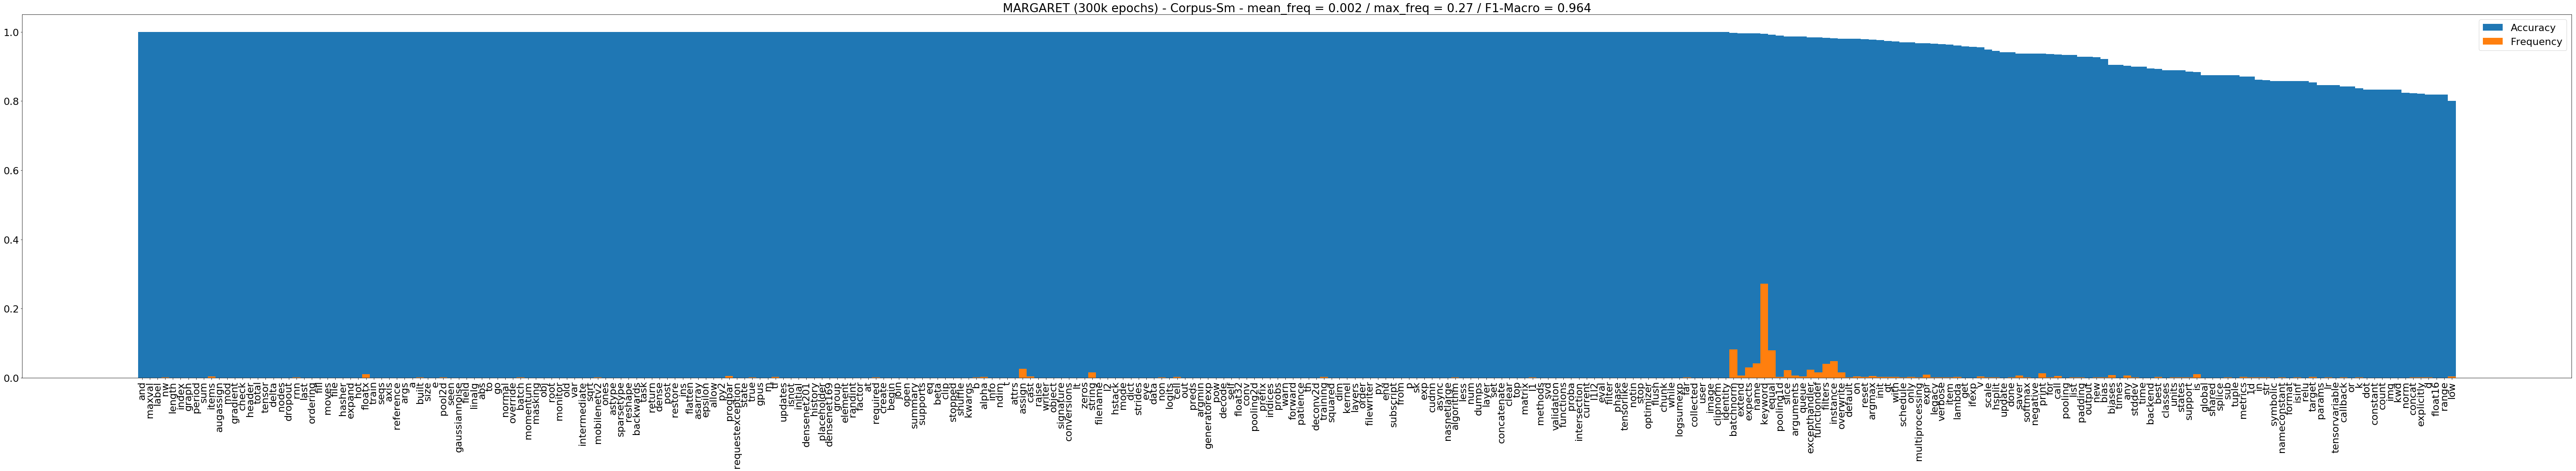

In [93]:
plt.figure(figsize=(80,15))
labels, values = zip(*c.most_common(300))

indexes = np.arange(len(labels))
width = 1

freqs = [per_token_freq[l] for l in labels]

mean_freq = np.mean(list(per_token_freq.values()))
mean_acc = (accuracy / len(results_df))

plt.bar(indexes, values, width, label='Accuracy')
plt.bar(indexes, freqs, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MARGARET (300k epochs) - Corpus-Sm - mean_freq = {:.3f} / max_freq = {:.2f} / F1-Macro = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('MARGARET-400k_epochs_top200.pdf')
plt.show()

In [119]:
pred = list(results_df.loc[10][3:])
pred

[2,
 31,
 32,
 33,
 95,
 33,
 14,
 510,
 37,
 24,
 25,
 20,
 22,
 1381,
 4,
 8,
 8,
 54,
 8,
 54,
 18,
 71,
 14,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [120]:
pred_str = [vocab_df.loc[i][0] for i in pred]

In [121]:
pred_str

['[CLS]',
 'functiondef',
 'arguments',
 'arg',
 'indices',
 'arg',
 'num',
 'classes',
 'expr',
 'str',
 'return',
 'call',
 'attribute',
 'one',
 '[MASK]',
 'name',
 'name',
 'keyword',
 'name',
 'keyword',
 'unaryop',
 'usub',
 'num',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [122]:
d = Counter(per_token_freq)
d.most_common(100)

[('name', 0.2768900957553237),
 ('attribute', 0.08194940688866657),
 ('call', 0.08043447191653566),
 ('num', 0.040588823781620695),
 ('str', 0.03930255823924539),
 ('binop', 0.03870230098613692),
 ('keyword', 0.02895526654280406),
 ('subscript', 0.02443904530513077),
 ('assign', 0.022381020437330285),
 ('index', 0.01940831785050736),
 ('compare', 0.01583535801057596),
 ('if', 0.014434757753322853),
 ('add', 0.014320423038445048),
 ('arg', 0.012119479777047306),
 ('nameconstant', 0.011833642989852794),
 ('tuple', 0.011690724596255538),
 ('return', 0.00980420180077176),
 ('unaryop', 0.007231670716021152),
 ('shape', 0.006917250250107189),
 ('slice', 0.006888666571387737),
 ('expr', 0.006774331856509933),
 ('arguments', 0.006145490924682006),
 ('list', 0.0054880663141346295),
 ('functiondef', 0.005287980563098471),
 ('comprehension', 0.005173645848220666),
 ('boolop', 0.004973560097184508),
 ('eq', 0.004659139631270544),
 ('mult', 0.004487637558953837),
 ('raise', 0.00431613548663713),
 (

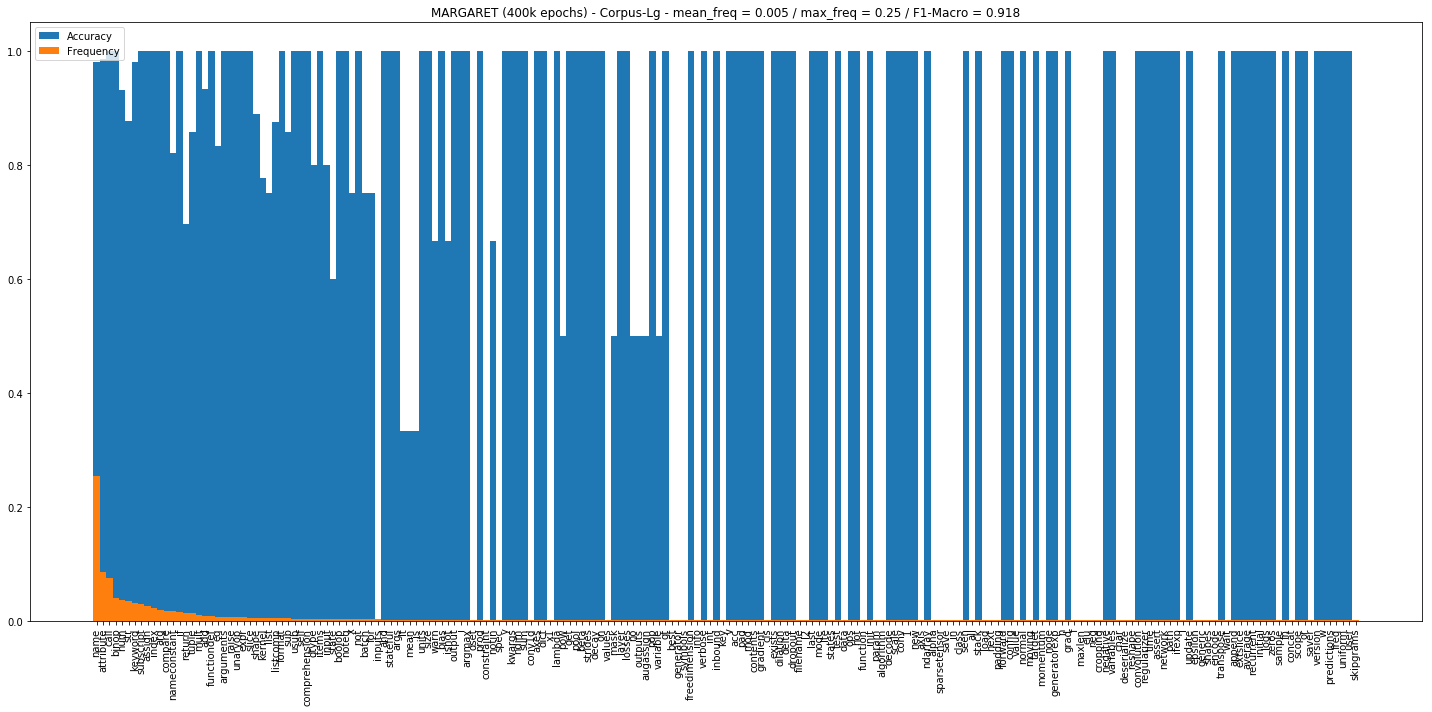

In [63]:
plt.figure(figsize=(20,10))
labels, values = zip(*d.most_common(200))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MARGARET (400k epochs) - Corpus-Lg - mean_freq = {:.3f} / max_freq = {:.2f} / F1-Macro = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('MARGARET-freq-400k_epochs_top200.png')
plt.show()

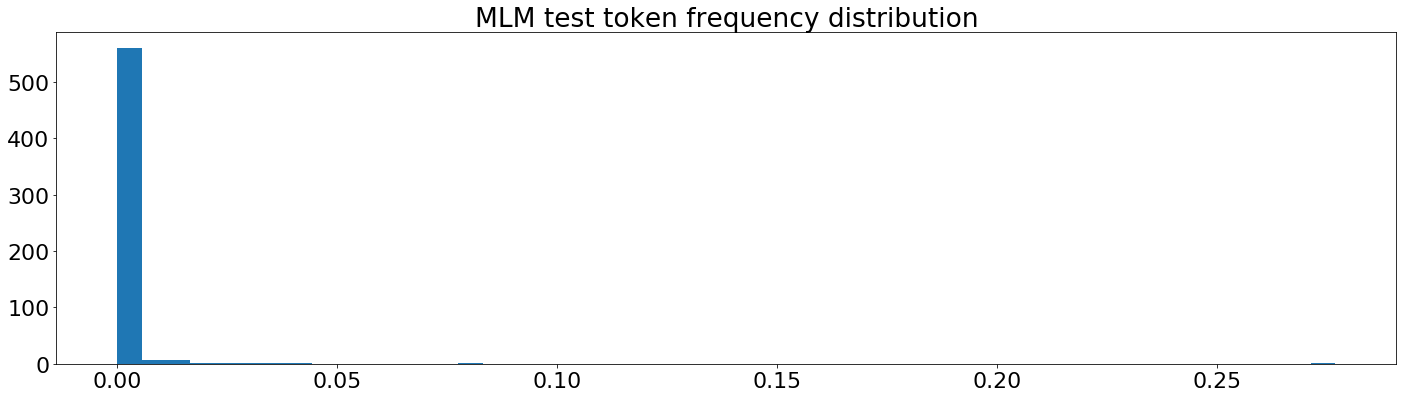

In [126]:
labels, values = zip(*d.most_common())

plt.figure(figsize=(20,6))
plt.title("MLM test token frequency distribution")
plt.hist(values,bins=50);
width = 1
plt.tight_layout()
#plt.xticks([i + width * 0.5 for i in range(16)], [str(i) for i in range(16)]);
plt.savefig("mlm-test-lg-freq.pdf")

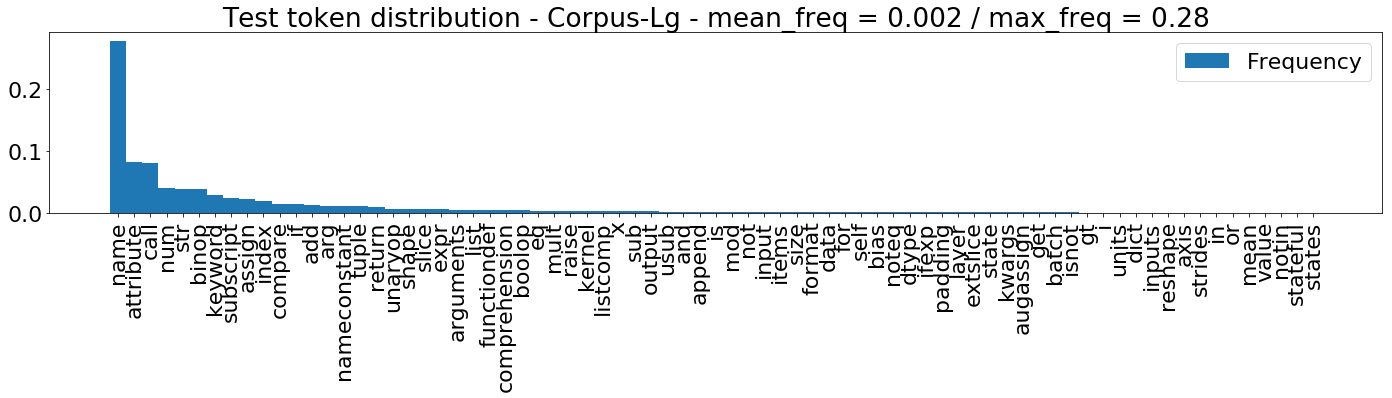

In [131]:
plt.figure(figsize=(20,6))
labels, values = zip(*d.most_common(75))

indexes = np.arange(len(labels))
width = 1

#plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('Test token distribution - Corpus-Lg - mean_freq = {:.3f} / max_freq = {:.2f}'.format(mean_freq, np.max(values)))
plt.legend()
plt.tight_layout()
plt.savefig('test-freq-epochs_top75.pdf')
plt.show()

In [ ]:
confusion = {}

In [ ]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if confusion.get(label, None) == None:
        confusion[label] = []
    if prediction != label:
        confusion[label].append(prediction)

In [ ]:
confusion_counter = {c: Counter(confusion[c]) for c in confusion}

In [ ]:
confusion_counter

In [ ]:
for key, c in confusion_counter.items():
    print("Label -- ", key)
    print('Preds -- ',' '.join(["{} ({})".format(c0, c1) for c0,c1 in c.most_common(5)]))
    print()

In [32]:
token_names = ["Module","Interactive","Expression","Suite","FunctionDef","AsyncFunctionDef","ClassDef","Return","Delete","Assign","AugAssign","For","AsyncFor","While","If","With","AsyncWith","Raise","Try","Assert","Import","ImportFrom","Global","Nonlocal","Expr","Pass","Break","Continue","BoolOp","BinOp","UnaryOp","Lambda","IfExp","Dict","Set","ListComp","SetComp","DictComp","GeneratorExp","Await","Yield","YieldFrom","Compare","Call","Num","Str","FormattedValue","JoinedStr","Bytes","NameConstant","Ellipsis","Constant","Attribute","Subscript","Starred","Name","List","Tuple","Load","Store","Del","AugLoad","AugStore","Param","Slice","ExtSlice","Index","And","Or","Add","Sub","Mult","MatMult","Div","Mod","Pow","LShift","RShift","BitOr","BitXor","BitAnd","FloorDiv","Invert","Not","UAdd","USub","Eq","NotEq","Lt","LtE","Gt","GtE","Is","IsNot","In","NotIn","excepthandler","ExceptHandler","arguments","arg","keyword","alias","withitem","comprehension"]
token_names = [t.lower() for t in token_names]

In [33]:
def is_ast_token(t):
    return t in token_names

In [34]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_ast_token(prediction) == is_ast_token(label)
    #if prediction != label:
    if right:
        mistaken[label]['correct'] += 1
        tot_right += 1
    else:
        mistaken[label]['wrong'] += 1
        tot_wrong += 1

In [35]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.9932113341204251, 0.00678866587957497)

In [36]:
MOD_SYMBOLS = ["Module", "Interactive", "Expression", "Suite"]
STMT_SYMBOLS = ["FunctionDef", "AsyncFunctionDef", "ClassDef", "Return", "Delete", \
                "Assign", "AugAssign", "For", "AsyncFor", "While", "If", "With", "AsyncWith", \
                "Raise", "Try", "Assert", "Import", "ImportFrom", "Global", "Nonlocal", \
                "Expr", "Pass", "Break", "Continue"]
EXPR_SYMBOLS = ["BoolOp", "BinOp", "UnaryOp", "Lambda", "IfExp", "Dict", "Set", "ListComp", \
                "SetComp", "DictComp", "GeneratorExp", "Await", "Yield", "YieldFrom", \
                "Compare", "Call", "Num", "Str", "FormattedValue", "JoinedStr", "Bytes", \
                "NameConstant", "Ellipsis", "Constant", "Attribute", "Subscript", \
                "Starred", "Name", "List", "Tuple"]
EXPR_CONTENT_SYMBOLS = ["Load", "Store", "Del", "AugLoad", "AugStore", "Param"]
SLICE_SYMBOLS = ["Slice", "ExtSlice", "Index"]
BOOLOP_SYMBOLS = ["And", "Or"]
OPERATOR_SYMBOLS = ["Add", "Sub", "Mult", "MatMult", "Div", "Mod", "Pow", "LShift", "RShift", \
                    "BitOr", "BitXor", "BitAnd", "FloorDiv"]
UNARYOP_SYMBOLS = ["Invert", "Not", "UAdd", "USub"]
CMPOP_SYMBOLS = ["Eq", "NotEq", "Lt", "LtE", "Gt", "GtE", "Is", "IsNot", "In", "NotIn"]
COMPREHENSION_SYMBOLS = ["comprehension"]
EXCEPT_SYMBOLS = ["excepthandler", "ExceptHandler"]
ARG_SYMBOLS = ["arguments", "arg", "keyword"]
IMPORT_SYMBOLS = ["alias", "withitem"]

In [37]:
def to_lower(l):
    return [l_.lower() for l_ in l]

In [38]:
MOD_SYMBOLS = to_lower(MOD_SYMBOLS)
STMT_SYMBOLS = to_lower(STMT_SYMBOLS)
EXPR_SYMBOLS = to_lower(EXPR_SYMBOLS)
EXPR_CONTENT_SYMBOLS = to_lower(EXPR_CONTENT_SYMBOLS)
SLICE_SYMBOLS = to_lower(SLICE_SYMBOLS)
BOOLOP_SYMBOLS = to_lower(BOOLOP_SYMBOLS)
OPERATOR_SYMBOLS = to_lower(OPERATOR_SYMBOLS)
UNARYOP_SYMBOLS = to_lower(UNARYOP_SYMBOLS)
CMPOP_SYMBOLS = to_lower(CMPOP_SYMBOLS)
COMPREHENSION_SYMBOLS = to_lower(COMPREHENSION_SYMBOLS)
EXCEPT_SYMBOLS = to_lower(EXCEPT_SYMBOLS)
ARG_SYMBOLS = to_lower(ARG_SYMBOLS)
IMPORT_SYMBOLS = to_lower(IMPORT_SYMBOLS)

In [39]:
def get_token_class_id(t):
    if t in MOD_SYMBOLS: return 0
    if t in STMT_SYMBOLS: return 1
    if t in EXPR_SYMBOLS: return 2
    if t in EXPR_CONTENT_SYMBOLS: return 3
    if t in SLICE_SYMBOLS: return 4
    if t in BOOLOP_SYMBOLS: return 5
    if t in OPERATOR_SYMBOLS: return 6
    if t in UNARYOP_SYMBOLS: return 7
    if t in CMPOP_SYMBOLS: return 8
    if t in ARG_SYMBOLS: return 9
    if t in EXCEPT_SYMBOLS: return 10
    if t in COMPREHENSION_SYMBOLS: return 11
    if t in IMPORT_SYMBOLS: return 12
    else: return 13

In [40]:
def is_same_class(t0, t1):
    return get_token_class_id(t0) == get_token_class_id(t1)

In [41]:
mistaken = {}; tot_right = 0; tot_wrong = 0
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if mistaken.get(label, None) == None:
        mistaken[label] = {'correct':0, 'wrong':0}
    right = is_same_class(prediction, label)
    #if prediction != label:
    if right:
        mistaken[label]['correct'] += 1
        tot_right += 1
    else:
        mistaken[label]['wrong'] += 1
        tot_wrong += 1

In [42]:
tot_right / (tot_right + tot_wrong), tot_wrong / (tot_right + tot_wrong)

(0.9867178276269185, 0.013282172373081463)

In [43]:
classes = ["MOD", "STMT", "EXPR", "EXPR_CONT", "SLICE", "BOOLOP", "OPERATOR", "UNARY", "CMPOP", "COMPR", "EXCEPT", "ARG", "IMPORT", "VAR"]

In [44]:
confusion_mat = np.zeros((14,14))
class_freqs = {str(i):0 for i in range(14)};
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    t0 = get_token_class_id(prediction)
    t1 = get_token_class_id(label)
    confusion_mat[t0][t1] += 1
    class_freqs[str(t1)] += 1

In [45]:
confusion_mat

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 2.280e+02, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00],
       [0.000e+00, 1.500e+01, 2.157e+03, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.400e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.010e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.000e+00,
        0.000e+00, 0.000e+00, 0

In [46]:
freqs = {k: v/len(results_df) for k,v in class_freqs.items()}
freqs

{'0': 0.0,
 '1': 0.07201889020070838,
 '10': 0.00029515938606847696,
 '11': 0.005312868949232586,
 '12': 0.0,
 '13': 0.15495867768595042,
 '2': 0.6384297520661157,
 '3': 0.0005903187721369539,
 '4': 0.029811097992916175,
 '5': 0.0023612750885478157,
 '6': 0.023612750885478158,
 '7': 0.005017709563164109,
 '8': 0.019185360094451005,
 '9': 0.048406139315230225}

In [47]:
np.sum(confusion_mat, axis=0)

array([0.000e+00, 2.440e+02, 2.163e+03, 2.000e+00, 1.010e+02, 8.000e+00,
       8.000e+01, 1.700e+01, 6.500e+01, 1.640e+02, 1.000e+00, 1.800e+01,
       0.000e+00, 5.250e+02])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


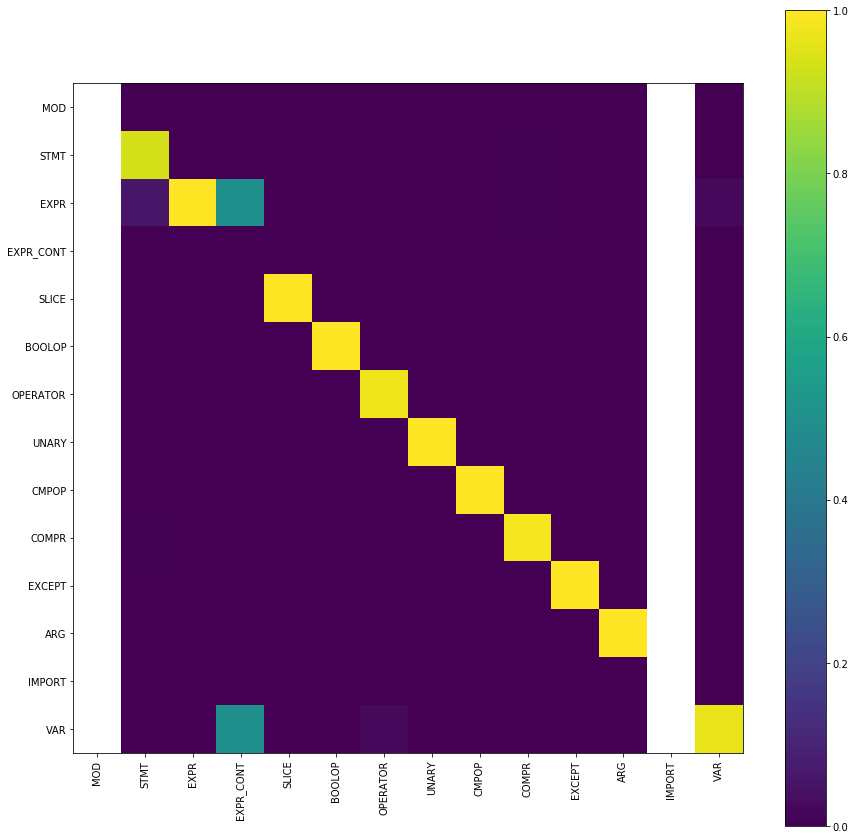

In [48]:
plt.figure(figsize=(15,15))
n = np.sum(confusion_mat, axis=0)
plt.imshow(confusion_mat / n)
plt.xticks(range(14), classes, rotation=90)
plt.yticks(range(14), classes)
plt.colorbar()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


MOD nan 0 0.0
STMT 0.934 244 0.072
EXPR 0.997 2163 0.638
EXPR_CONT 0.0 2 0.001
SLICE 1.0 101 0.03
BOOLOP 1.0 8 0.002
OPERATOR 0.975 80 0.024
UNARY 1.0 17 0.005
CMPOP 1.0 65 0.019
COMPR 0.988 164 0.048
EXCEPT 1.0 1 0.0
ARG 1.0 18 0.005
IMPORT nan 0 0.0
VAR 0.968 525 0.155


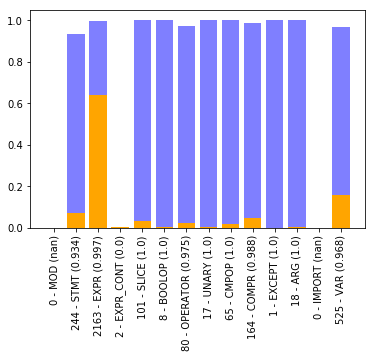

In [49]:
n = np.sum(confusion_mat, axis=0)
normed = confusion_mat / n
for i in range(14):
    plt.bar(classes[i], np.around(normed[i][i],3), color='b', alpha=0.5)
    plt.bar(classes[i], np.around(freqs[str(i)],3), color='orange')
    print(classes[i], np.around(normed[i][i],3), class_freqs[str(i)], np.around(freqs[str(i)],3))
plt.xticks(range(14), [str(class_freqs[str(i)])+" - "+c + " (" + str(np.around(normed[i][i],3)) + ")" for i,c in enumerate(classes)], rotation=90);

In [50]:
[freqs[str(i)]*normed[i][i] for i in range(14)]

[nan,
 0.06729634002361275,
 0.6366587957497049,
 0.0,
 0.029811097992916175,
 0.0023612750885478157,
 0.023022432113341203,
 0.005017709563164109,
 0.019185360094451005,
 0.04781582054309327,
 0.00029515938606847696,
 0.005312868949232586,
 nan,
 0.14994096812278632]

In [51]:
from sklearn.metrics import f1_score

In [52]:
preds = []; labels = []
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    t0 = get_token_class_id(prediction)
    t1 = get_token_class_id(label)
    preds.append(prediction)
    labels.append(label)

In [53]:
f1_score(labels, preds, average='micro')

0.9158795749704841

In [54]:
f1_score(labels, preds, average='macro')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.5054794553485005

In [55]:
f1_score(labels, preds, average='weighted')

0.9094296595935276

## Naturalness 2.0

In [132]:
keras_z = {0:0, 1:0, 2:-7.15, 3:0, 4:0, 5:0, 6:7.90, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

In [133]:
requests_z = {0:-0.09, 1:-3.95, 2:0.08, 3:0, 4:-0.42, 5:0, 6:3.95, 7:-0.25, 8:0, 9:0, 10:0, 11:0, 12:0}

In [134]:
flask_z = {0:-0.17, 1:-2.52, 2:0.27, 3:0, 4:-0.56, 5:0, 6:2.52, 7:-0.25, 8:0, 9:0, 10:0, 11:0, 12:0}

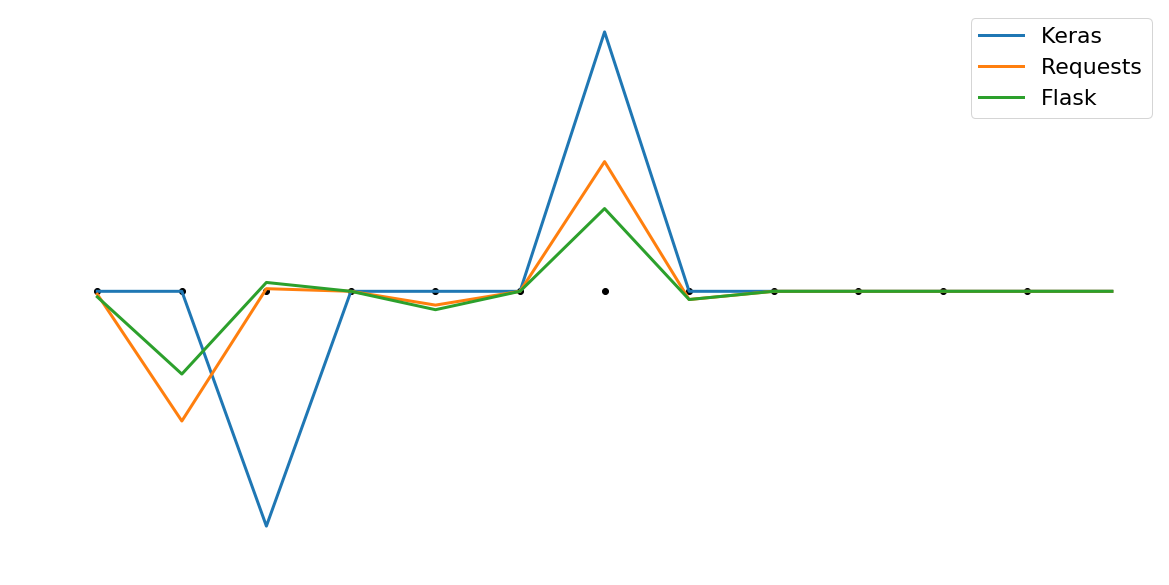

In [155]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.plot([0]*12, '.', c='k', linewidth=5, markersize=12)
plt.plot(keras_z.values(), linewidth=3, label="Keras")
plt.plot(requests_z.values(), linewidth=3, label="Requests")
plt.plot(flask_z.values(), linewidth=3, label="Flask")
plt.legend();
plt.savefig("n2.pdf")